### Import Data

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from os import listdir
from os.path import join
from scipy.io import loadmat
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

sns.set_context("notebook")
sns.set_style("darkgrid")

In [33]:
path = "data"
files = listdir(path)
files

['data_2d.csv', 'mnist.csv']

### DataSet 1

In [34]:
d2d = pd.read_csv(join(path, files[0]), header=None)
d2d.index += 1
d2d

,0,1,2
1,0.0,-0.768716,0.460860
2,0.0,2.687848,2.366961
3,0.0,-0.201379,0.470430
4,0.0,0.608496,1.225400
5,0.0,-0.082282,1.137218
...,...,...,...
196,1.0,0.629144,4.378584
197,1.0,-0.723824,5.361801
198,1.0,1.346107,2.333476
199,1.0,3.608219,3.411546


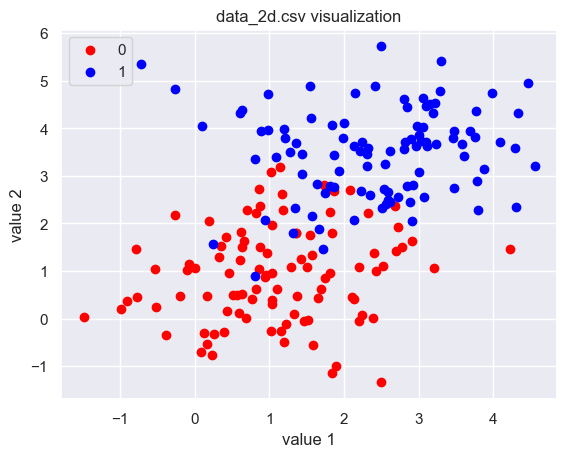

In [35]:
plt.scatter(d2d[1][d2d[0] == 0], d2d[2][d2d[0] == 0], c="r", label="0")
plt.scatter(d2d[1][d2d[0] == 1], d2d[2][d2d[0] == 1], c="b", label="1")
plt.title("data_2d.csv visualization")
plt.xlabel("value 1")
plt.ylabel("value 2")
plt.legend()
plt.show()

DataSet without first column

In [36]:
d2d_pure = d2d.to_numpy()[:, 1:]
d2d_pure

array([[-7.68716460e-01,  4.60860308e-01],
       [ 2.68784756e+00,  2.36696066e+00],
       [-2.01379356e-01,  4.70429935e-01],
       [ 6.08495680e-01,  1.22540003e+00],
       [-8.22819045e-02,  1.13721812e+00],
       [ 2.08306930e+00,  2.69448209e+00],
       [ 1.50301985e+00,  1.07484727e+00],
       [ 3.91662001e-01, -2.87497166e-01],
       [ 3.21377111e-01,  1.29674301e+00],
       [ 5.91248258e-01,  1.26716412e-01],
       [ 1.15057763e+00, -2.66403844e-01],
       [ 9.42586669e-01,  8.67662423e-01],
       [ 1.35780613e+00,  1.80547155e+00],
       [ 1.16291991e+00,  2.62243013e+00],
       [-9.78685124e-02,  1.01230581e+00],
       [ 8.57774175e-01,  1.03196525e+00],
       [ 6.83436732e-01,  1.57813996e-02],
       [ 1.54377185e+00,  1.75023055e+00],
       [ 1.18707877e+00,  2.27701972e+00],
       [ 1.89101082e+00, -1.00154114e+00],
       [-5.18159650e-01,  2.52789282e-01],
       [ 6.25738132e-01,  1.81889957e+00],
       [ 9.73557703e-01,  1.38186873e+00],
       [ 2.

Function to show elbow method on the distortion cost function

In [37]:
def show_elbow(data_set, max_value=20):
    inertions = []

    for i in range(1, max_value):
        model = KMeans(n_clusters=i, n_init="auto")
        model.fit(data_set)
        inertions.append(model.inertia_)

    plt.plot(range(1, max_value), inertions)
    plt.title("Elbow Method on Distortion Cost Function")
    plt.xlabel("Number of clusters")
    plt.ylabel("Distortion")
    plt.show()

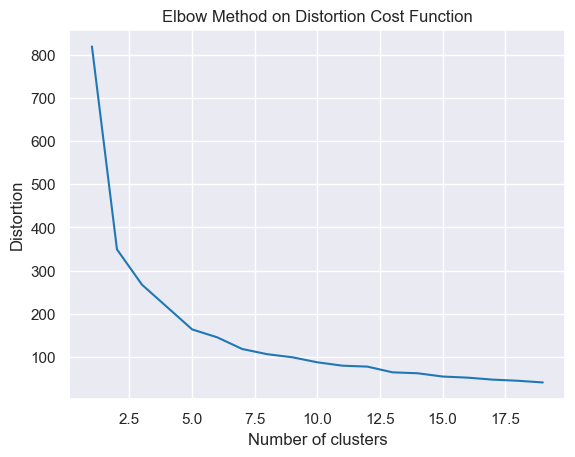

In [38]:
show_elbow(d2d_pure)

Conclusion: The elbow method on the distortion cost function shows two bends: for 2 and 5 clusters.

Function to show clusterized dataset

In [39]:
def show_dataset(data_set, number_clusters):
    model = KMeans(n_clusters=number_clusters, n_init="auto")
    model.fit(data_set)
    
    plt.scatter(x=data_set[:, :1], y=data_set[:, 1:], c=model.labels_)
    plt.scatter(x=model.cluster_centers_[:, :1], y=model.cluster_centers_[:, 1:], c="r", marker="+")
    plt.title(f"DataSet with {number_clusters} clusters")
    plt.xlabel("Value 1")
    plt.ylabel("Value 2")
    plt.show()

Visualization of 2 clusters

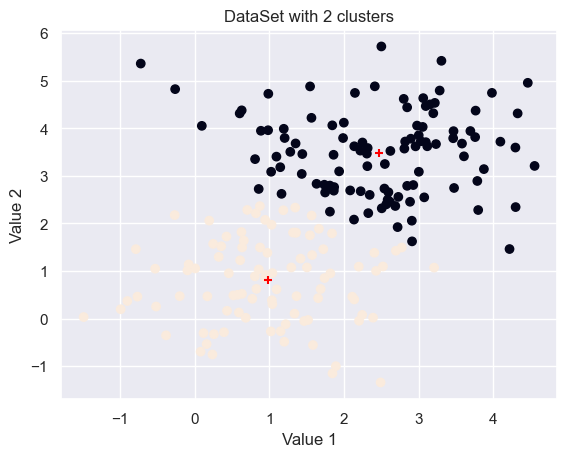

In [40]:
show_dataset(data_set=d2d_pure, number_clusters=2)

Visualization of 5 clusters

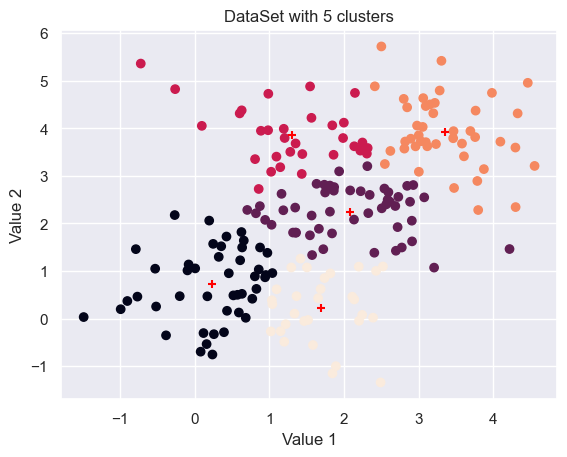

In [41]:
show_dataset(data_set=d2d_pure, number_clusters=5)

### DataSet 2

In [42]:
mnist = pd.read_csv(join(path, files[1]), header=None)
print(mnist.shape)
mnist.head()

(500, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


DataSet without first column with digits

In [43]:
digits = mnist.to_numpy()[:, :1]
mnist_pure = mnist.to_numpy()[:, 1:]
print(digits.shape)
print(mnist_pure.shape)

(500, 1)
(500, 784)


Function for visualization of one item from the mnist dataset

In [44]:
def show_digit(position=1):
    xx = 1
    yy = 28
    
    for item in mnist_pure[position-1:position][0]:
        if item == 0:
            color = "w"
        else:
            color = ("k", item/255)
        plt.scatter(xx, yy, c=color, marker="s")
        xx +=1
        if xx == 29:
            xx = 1
            yy -= 1

    plt.title(f"Visualisation of the digit '{digits[position-1][0]}' per pixel from the 'mnist' dataset")
    plt.show()

Enter an integer number between 1 and 500 inclusive into the function

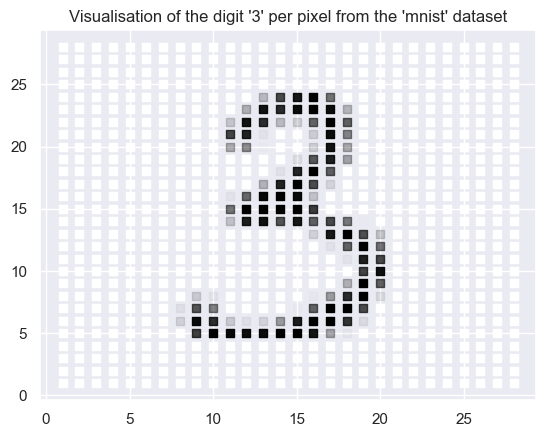

In [45]:
show_digit(77)

Data scaling

In [46]:
sclr = MinMaxScaler()
mnist_sc = sclr.fit_transform(mnist_pure)
mnist_sc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Elbow method on the distortion cost function

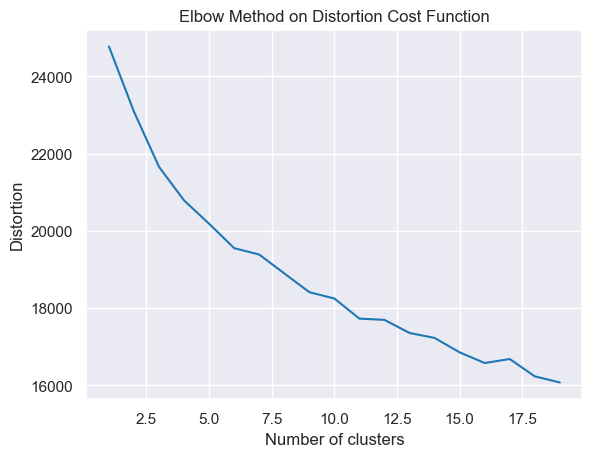

In [47]:
show_elbow(mnist_sc)

Conclusion: From the elbow method on pure data it is impossible to define the optimal number of clusters as there is no clear bend.

PCA algorithm to reduce the dimensionality of the dataset to a 2-dimensional version

In [48]:
mnist_pca = PCA(n_components=2).fit_transform(mnist_pure)

Elbow method on the distortion cost function for 2-dimensional data

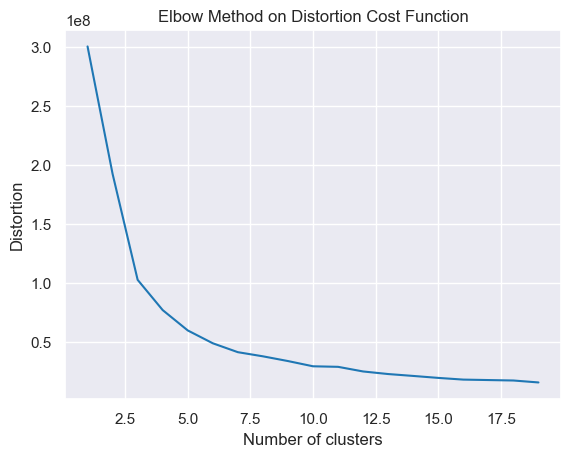

In [49]:
show_elbow(mnist_pca)

Conclusion: After reducing the 'mnist' dataset to the two-dimensional version, there is now a clear 5-cluster fold, but it is still not an optimal value since there are 10 digits in the 'mnist' dataset.

Visualization of 5 clusters

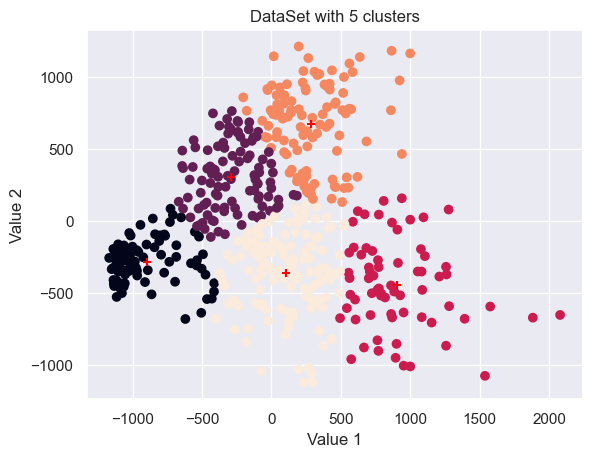

In [50]:
show_dataset(data_set=mnist_pca, number_clusters=5)

Visualization of 10 clusters

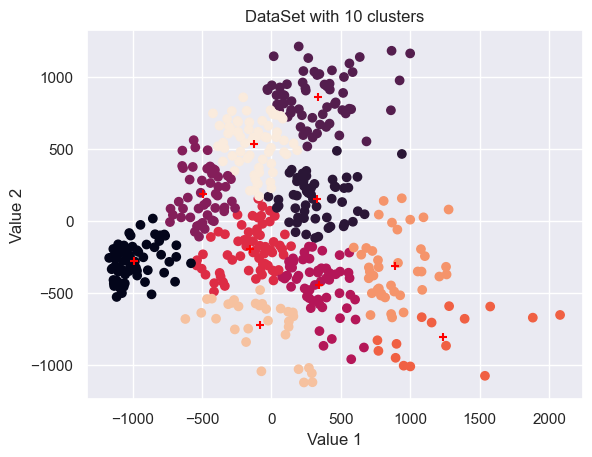

In [51]:
show_dataset(data_set=mnist_pca, number_clusters=10)

The simpliest model with an elbow on 10 clusters is the 8-dimensional dataset

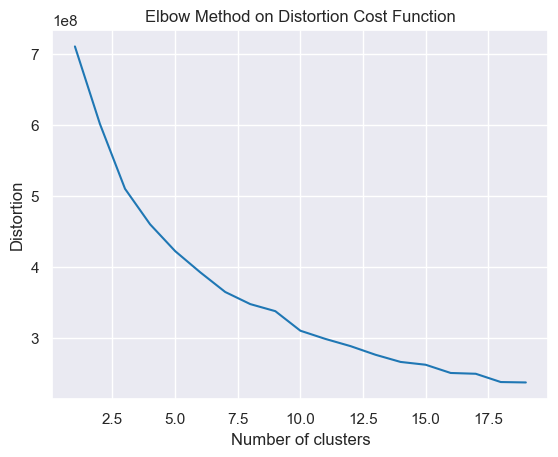

In [52]:
mnist_pca_5 = PCA(n_components=8).fit_transform(mnist_pure)
show_elbow(mnist_pca_5)